# 鐵達尼範例

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 欄位整理
label == alive

初步發現survived欄位與alive重複

sex與who欄位相似

In [2]:
print('包含null欄位:')
print(df.isnull().sum())
print('---------------------')
print('標籤統計:')
print(df['survived'].value_counts())
print('---------------------')
print('重複特徵查看:')
print(df['who'].value_counts())
print(' ')
print(df['sex'].value_counts())

包含null欄位:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
---------------------
標籤統計:
0    549
1    342
Name: survived, dtype: int64
---------------------
重複特徵查看:
man      537
woman    271
child     83
Name: who, dtype: int64
 
male      577
female    314
Name: sex, dtype: int64


# 欄位探討1

sex與who欄位無法完全取代

加入age看看,看能不能順便清理此欄位

'survived'

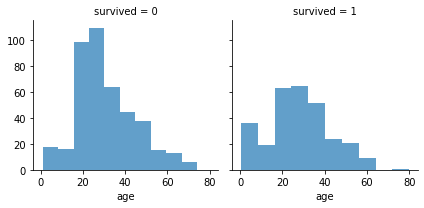

In [3]:
#先看nan多的欄位
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7 )
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ['age']

cond_hists(df, plot_cols2, 'survived')
#年幼不易死亡,age欄位分布是否能用其他欄位替代

# 欄位探討2

deck欄位與who欄位

BCDEF夾板,有特徵分離,但nan值實在太多

who欄位如果取1.4倍存活率差距以上是可以分離age的

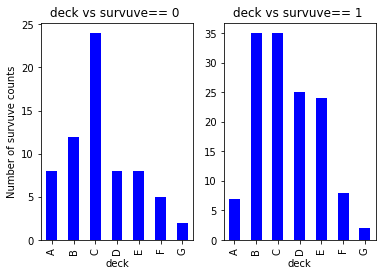

1.4倍差距存活率
['B', 'C', 'D', 'E', 'F']


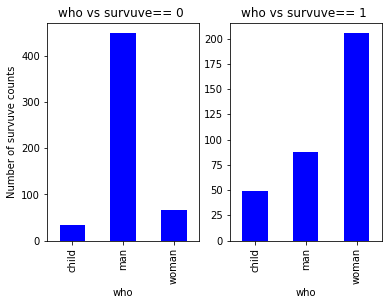

1.4倍差距存活率
['child', 'woman']


In [4]:
#nan欄位2
#定義存活率與各欄位比較
import matplotlib.pyplot as plt
def plot_bar_survive(df, bar_columns,n):
    for col in  bar_columns:
        #------------畫圖區塊-------------#        
        fig, axs = plt.subplots(1, 2)

        counts0 = df[df[ 'survived' ]== 0][col].value_counts().sort_index() 
        counts0.plot.bar(ax = axs[0], color = 'blue') 
        axs[0].set_title(col+' vs survuve== 0 ') 
        axs[0].set_xlabel(col) 
        axs[0].set_ylabel('Number of survuve counts')

        counts1 = df[df[ 'survived' ]== 1][col].value_counts().sort_index() 
        counts1.plot.bar(ax = axs[1], color = 'blue') 
        axs[1].set_title(col+' vs survuve== 1 ') 
        axs[1].set_xlabel(col) 
        plt.show()
        plt.close()
        #--------------------------------#
        #---------定義N倍以上差距(相同欄位比較)---------#
        list_count = []
        if counts0.shape[0]>counts1.shape[0]:
            for x in range(counts0.shape[0]):
                try: 
                    if counts1[counts1.index[x]]>n*counts0[counts1.index[x]]:
                        list_count.append(counts1.index[x])
                except:
                    if counts0.index[x] is not None:
                        pass
                    else:
                        list_count.append(counts1.index[x])
        else:
            for x in range(counts1.shape[0]):
                try: 
                    if counts1[counts1.index[x]]>n*counts0[counts1.index[x]]:
                        list_count.append(counts1.index[x])
                except:
                    if counts0.index[x] is not None:
                        pass
                    else:
                        list_count.append(counts1.index[x])
        print(str(n)+'倍差距存活率')
        print(list_count)
        #--------------------------------------------#
    
bar_columns = ['deck','who']

plot_bar_survive(df,bar_columns,1.4)
#BCDEF夾板,有特徵分離nan但nan值實在太多
#who欄位如果取1.4倍存活率差距以上是可以分離age的

# 初步清除不需要的欄位

'age'與'deck'

In [5]:
#age 與deck 欄位
null_seris = df.isnull().sum()
null_list = [x  for x,y in zip(null_seris.index,null_seris.values) if y>0.1*len(df)  ] 
# 剔除1成data以上的null
for col in null_list:
    df = df.drop(col, axis =1)

# 欄位探討2

fare票價級距太大,無法凸顯特徵

先整理特徵

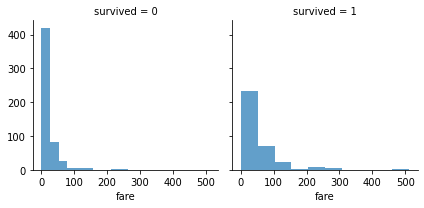

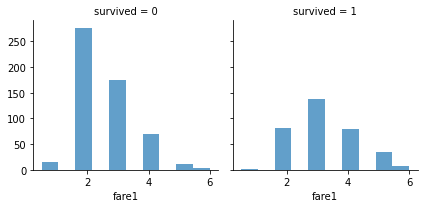

In [6]:
#將票價級距化,發現有稍微分離趨勢
import numpy as np 

df['fare1'] = df.fare.apply(np.log).apply(np.round)
#取log後1以下會成為 -(np.inf)
df['fare1'] = df['fare1'].replace(-(np.inf),0.5)
plot_cols2 = ['fare','fare1']
cond_hists(df, plot_cols2, 'survived')
#取代原本欄位
df['fare'] = df['fare1']

# 分析其他欄位與特徵關係

C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


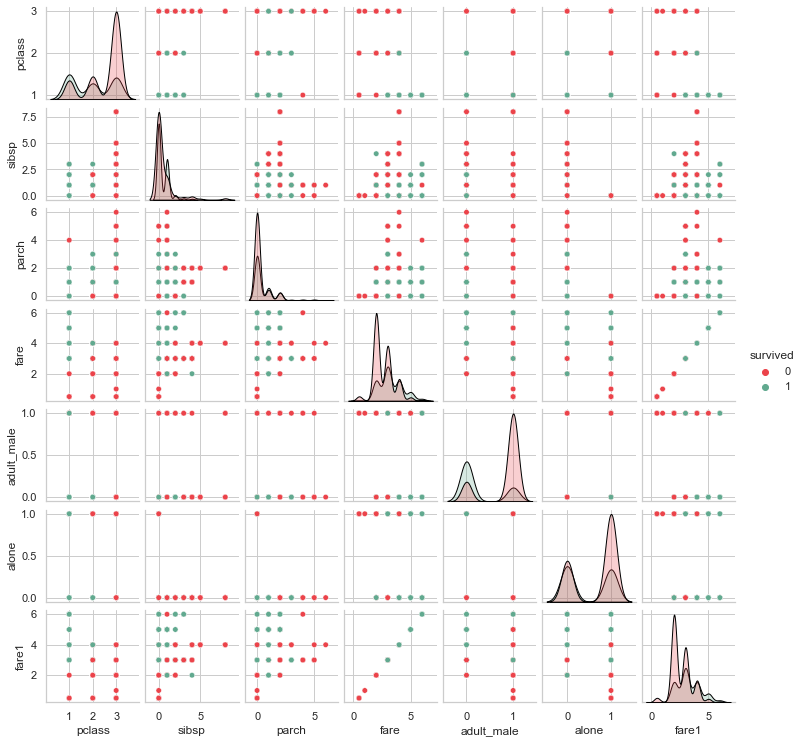

In [8]:
sns.set(style='whitegrid', color_codes=True)
sns.pairplot(df, 
             kind='scatter', 
             hue='survived', 
             size=1.5, 
             plot_kws={'s': 30}, 
             diag_kws={'edgecolor':'black'}, 
             palette={0:'#EB434A', 1:'#61A98F'});

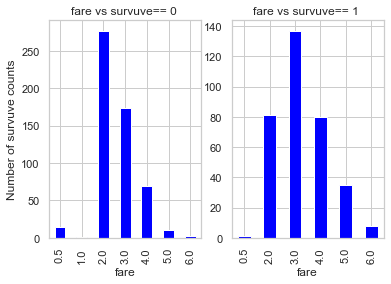

1.4倍差距存活率
[5.0, 6.0]


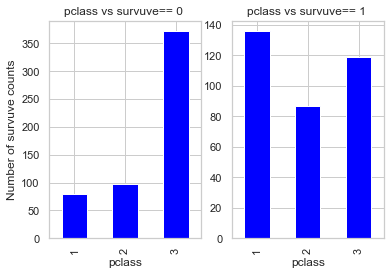

1.4倍差距存活率
[1]


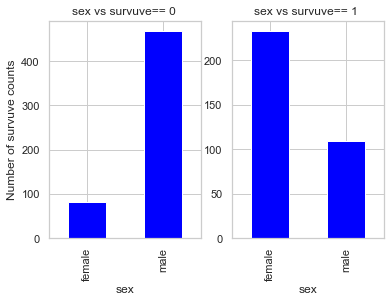

1.4倍差距存活率
['female']


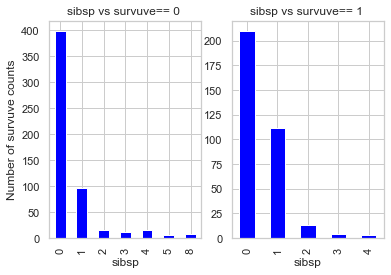

1.4倍差距存活率
[]


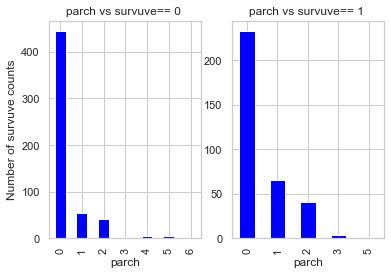

1.4倍差距存活率
[3]


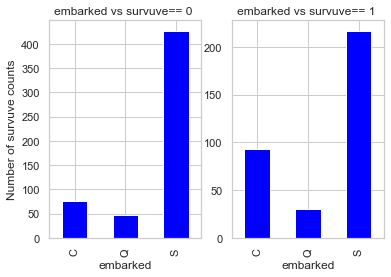

1.4倍差距存活率
[]


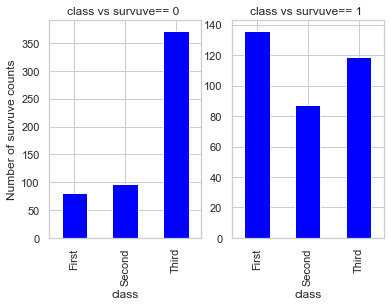

1.4倍差距存活率
['First']


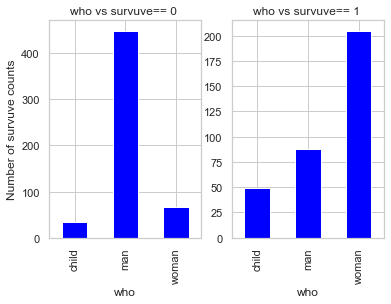

1.4倍差距存活率
['child', 'woman']


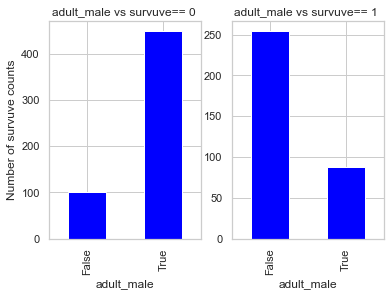

1.4倍差距存活率
[False]


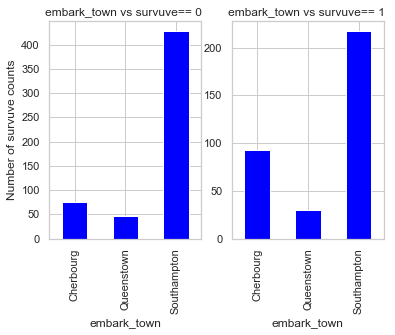

1.4倍差距存活率
[]


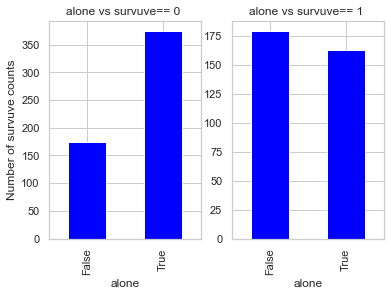

1.4倍差距存活率
[]


In [9]:
#看那些欄位可以特徵分離
bar_columns = ['fare' ,'pclass',"sex","sibsp",'parch','embarked',
              'class','who','adult_male','embark_town', 'alone']

plot_bar_survive(df,bar_columns,1.4)
#'sibsp','embarked','embark_town', 'alone'欄位無法分離

In [10]:
##刪除重複欄位
df = df.drop('alive',axis = 1)


In [11]:
#去除'sibsp','embarked','embark_town', 'alone'欄位
drop_columns = ['sibsp','embarked','embark_town', 'alone']
df = df.drop(drop_columns,axis = 1)

# 開始分標籤與特徵

In [12]:
#定義特徵與標籤
y = df.survived
X = df.iloc[:,1:]

# 編碼特徵欄位

In [13]:
#編碼欄位
X = pd.get_dummies(X, columns=['who','class'], prefix='', prefix_sep='')
adult_male_mapping = {True:1 ,False :0}
X.adult_male = X.adult_male.map(adult_male_mapping)
sex_mapping = {'male':1 , "female":0}
X.sex = X.sex.map(sex_mapping)

X = pd.get_dummies(X, columns=['pclass'], prefix='pclass=', prefix_sep='')
X = pd.get_dummies(X, columns=['fare'], prefix='fare=', prefix_sep='')

# 拆分資料集與訓練集

In [14]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# 開始帶入預測模型

# 羅吉斯回歸


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

lr = LogisticRegression( random_state=1)
#用gridsearch cv找超參數
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'C': param_range}]

gs = GridSearchCV(estimator= lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)        
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)


lr = gs.best_estimator_
# lr.fit(X_train, y_train)
# lr.score(X_test, y_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
lr_value = np.mean(scores)

0.8216666666666667
{'C': 1.0}
CV accuracy: 0.822 +/- 0.053


# 決策樹

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(criterion='gini',                     
                              random_state=1)
# tree.fit(X_train, y_train)
# tree.score(X_test, y_test)
#用gridsearch cv找超參數
param_range = [5,10, 50, 100] 
param_grid = [{'max_depth': param_range}]
gs = GridSearchCV(estimator= tree, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)        
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

tree = gs.best_estimator_
# tree.fit(X_train, y_train)
# tree.score(X_test, y_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=tree,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
tree_value = np.mean(scores)

0.8046892655367233
{'max_depth': 10}
CV accuracy: 0.805 +/- 0.041


# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4, 
                           p=2, 
                           metric='minkowski')
# knn.fit(X_train, y_train)
# knn.score(X_test,y_test,sample_weight=None)

#用gridsearch cv找超參數

param_grid = [{'n_neighbors': range(1,11),
             'p': range(2,11)}]


gs = GridSearchCV(estimator= knn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)        
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

knn = gs.best_estimator_


from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=knn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

knn_value = np.mean(scores)

0.8064689265536723
{'n_neighbors': 9, 'p': 4}
CV accuracy: 0.806 +/- 0.035


# 隨機森林

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

forest = RandomForestClassifier()
# clf.fit(X_train,y_train)
# clf.score(X_test,y_test) 
n_estimators = [10, 50, 100, 150 ,200]
param_grid = [{'n_estimators': range(1,11),
             'max_depth': range(2,11)}]


gs = GridSearchCV(estimator= forest, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)        
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

forest = gs.best_estimator_

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
forest_value = np.mean(scores)

0.8164971751412429
{'max_depth': 6, 'n_estimators': 5}
CV accuracy: 0.820 +/- 0.049


# SVC

In [19]:
from sklearn.svm import SVC

svm = SVC( random_state=1)
# svm.fit(X_train,y_train)
# svm.score(X_test,y_test) 

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'C': param_range, 
               'kernel': ['linear']},
              {'C': param_range, 
               'gamma': param_range, 
               'kernel': ['rbf']}]    
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)     
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

svm = gs.best_estimator_

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=svm,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
svm_value = np.mean(scores)

0.8182485875706215
{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
CV accuracy: 0.818 +/- 0.052


# naive_bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
GNB_value = classifier.score(X_test,y_test) 

GNB_value

0.6666666666666666

# Perceptron

In [21]:
from sklearn.linear_model import Perceptron

ppn = Perceptron( random_state=1)


param_range = [0.0001, 0.001, 0.01, 0.1]

param_grid = [{'max_iter': range(10,100,10), 
               'eta0': param_range }]    
gs = GridSearchCV(estimator=ppn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)     
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

ppn = gs.best_estimator_

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=ppn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
ppn_value = np.mean(scores)

0.7946892655367231
{'eta0': 0.001, 'max_iter': 10}
CV accuracy: 0.795 +/- 0.046


# SGDClassifier

In [22]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='hinge',  n_iter_no_change=100)

param_range = ['perceptron','log','hinge']

param_grid = [{'n_iter_no_change': range(10,100,10), 
               'loss': param_range }]    
gs = GridSearchCV(estimator=sgd, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)     
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

sgd = gs.best_estimator_

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=sgd,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
sgd_value = np.mean(scores)

0.806271186440678
{'loss': 'log', 'n_iter_no_change': 40}
CV accuracy: 0.796 +/- 0.053


# MLPClassifier

In [23]:
from sklearn.neural_network import MLPClassifier

nn_mod = MLPClassifier()




param_grid = [{'hidden_layer_sizes':range(10,100,10)}]    
gs = GridSearchCV(estimator=nn_mod, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)     
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

nn_mod = gs.best_estimator_

from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= nn_mod,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
# print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
mlp_value = np.mean(scores)

C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8232485875706216
{'hidden_layer_sizes': 50}


C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer:

CV accuracy: 0.822 +/- 0.051


C:\Users\rrrqq\Documents\anaconda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# 最後模型評估

In [25]:
score_df =pd.DataFrame({
    'Model': ["Logistic", "Desicion Tree" , 'KNN' ,'RandomForest',
             'SVM', "GaussianNB",'Perceptron', "SGD", "MLP" ],
    'Score': [lr_value, tree_value, knn_value, forest_value, 
              svm_value, GNB_value, ppn_value, sgd_value, mlp_value]})

In [26]:
score_df.sort_values('Score', ascending=False)

,Model,Score
0,Logistic,0.821667
8,MLP,0.821525
3,RandomForest,0.819802
4,SVM,0.818249
2,KNN,0.806469
1,Desicion Tree,0.804689
7,SGD,0.796102
6,Perceptron,0.794689
5,GaussianNB,0.666667
